<a href="https://colab.research.google.com/github/juancsabogal/NeelProject/blob/main/AI_CLUB_PROJECT-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [51]:
path ="https://raw.githubusercontent.com/MSU-AI/Fetal-State-Predictor/main/AI_Club_2.csv"

In [52]:
data = pd.read_csv(path,encoding='unicode_escape')

In [53]:
data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,12/1/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,5/3/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,6/6/98,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,6/6/98,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [55]:
miss_value=['N/a','na','NaN',np.nan]
data = pd.read_csv(path,na_values=miss_value)
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [56]:
data.isnull().any()

FileName    True
Date        True
SegFile     True
b           True
e           True
LBE         True
LB          True
AC          True
FM          True
UC          True
ASTV        True
MSTV        True
ALTV        True
MLTV        True
DL          True
DS          True
DP          True
DR          True
Width       True
Min         True
Max         True
Nmax        True
Nzeros      True
Mode        True
Mean        True
Median      True
Variance    True
Tendency    True
A           True
B           True
C           True
D           True
E           True
AD          True
DE          True
LD          True
FS          True
SUSP        True
CLASS       True
NSP         True
dtype: bool

In [57]:
data=data.dropna()

In [58]:
dummies=pd.get_dummies(data.NSP)
merged_data=pd.concat([data,dummies],axis='columns')
merged_data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,AD,DE,LD,FS,SUSP,CLASS,NSP,1.0,2.0,3.0
1,Variab10.txt,12/1/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9.0,2.0,0,1,0
2,Fmcs_1.txt,5/3/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1,0,0
3,Fmcs_1.txt,5/3/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1,0,0
4,Fmcs_1.txt,5/3/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1,0,0
5,Fmcs_1.txt,5/3/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,S8001045.dsp,6/6/98,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0
2123,S8001045.dsp,6/6/98,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0
2124,S8001045.dsp,6/6/98,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0
2125,S8001045.dsp,6/6/98,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0


In [59]:
merged_data = merged_data[['LB', 'FM', 'UC', 'ASTV','ALTV',1.0,2.0,3.0]]

In [60]:
merged_data 

,LB,FM,UC,ASTV,ALTV,1.0,2.0,3.0
1,120.0,0.0,0.0,73.0,43.0,0,1,0
2,132.0,0.0,4.0,17.0,0.0,1,0,0
3,133.0,0.0,5.0,16.0,0.0,1,0,0
4,134.0,0.0,6.0,16.0,0.0,1,0,0
5,132.0,0.0,5.0,16.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...
2122,140.0,0.0,6.0,79.0,25.0,0,1,0
2123,140.0,0.0,9.0,78.0,22.0,0,1,0
2124,140.0,0.0,7.0,79.0,20.0,0,1,0
2125,140.0,0.0,9.0,78.0,27.0,0,1,0


In [61]:
x= merged_data.iloc[:, :5].values
y= merged_data.iloc[:, 5:].values

In [62]:
x

array([[120.,   0.,   0.,  73.,  43.],
       [132.,   0.,   4.,  17.,   0.],
       [133.,   0.,   5.,  16.,   0.],
       ...,
       [140.,   0.,   7.,  79.,  20.],
       [140.,   0.,   9.,  78.,  27.],
       [142.,   1.,   5.,  74.,  36.]])

In [63]:
y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [64]:
x.shape

(2126, 5)

In [65]:
y.shape

(2126, 3)

In [66]:
!pip install keras-tuner --upgrade
!pip install tensorflow
!pip install keras-tuner -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [68]:
X=merged_data.iloc[:,0:5].values
Y=merged_data.iloc[:,5:].values

In [69]:
X

array([[120.,   0.,   0.,  73.,  43.],
       [132.,   0.,   4.,  17.,   0.],
       [133.,   0.,   5.,  16.,   0.],
       ...,
       [140.,   0.,   7.,  79.,  20.],
       [140.,   0.,   9.,  78.,  27.],
       [142.,   1.,   5.,  74.,  36.]])

In [70]:
Y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [71]:
def build_model(hp):
  model=keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(3,activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [72]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='projectAI',project_name='Fetal_State_Predictor')

In [73]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [74]:
from pandas.core.indexers import length_of_indexer
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


train_test_split(x_train,y_train)

[array([[140.,   0.,   9.,  78.,  22.],
        [144.,   0.,   5.,  45.,  13.],
        [121.,   2.,   5.,  56.,   0.],
        ...,
        [125.,   0.,   3.,  37.,   5.],
        [129.,   0.,   5.,  23.,   0.],
        [128.,  19.,   3.,  52.,   0.]]),
 array([[126.,  29.,   5.,  41.,   2.],
        [132.,   3.,   0.,  61.,  35.],
        [120.,   0.,   3.,  64.,   0.],
        ...,
        [132.,   0.,   9.,  32.,   0.],
        [133.,   0.,   5.,  60.,   0.],
        [132.,   0.,   2.,  20.,   0.]]),
 array([[0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]], dtype=uint8),
 array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        ...,
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0]], dtype=uint8)]

In [75]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

In [76]:
tuner.results_summary()

Results summary
Results in projectAI/Fetal_State_Predictor
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 160
learning_rate: 0.01
Score: 0.7754303614298502
Trial summary
Hyperparameters:
num_layers: 17
units_0: 96
learning_rate: 0.0001
Score: 0.3356807505091031
Trial summary
Hyperparameters:
num_layers: 6
units_0: 448
learning_rate: 0.01
Score: 0.3161189357439677
Trial summary
Hyperparameters:
num_layers: 19
units_0: 96
learning_rate: 0.01
Score: 0.12128325303395589
Trial summary
Hyperparameters:
num_layers: 15
units_0: 224
learning_rate: 0.0001
Score: 0.10485132783651352


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def classification_model():
    # create model
    model = Sequential()

    model.add(Dense(224,activation='relu', input_shape=(5,)))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [78]:
model=classification_model()

In [79]:
model.fit(x_train, y_train, validation_split=0.3, epochs=10, verbose=2)

Epoch 1/10
38/38 - 1s - loss: 1.0989 - accuracy: 0.7378 - val_loss: 0.5634 - val_accuracy: 0.8078 - 907ms/epoch - 24ms/step
Epoch 2/10
38/38 - 0s - loss: 0.6132 - accuracy: 0.8034 - val_loss: 0.7597 - val_accuracy: 0.8176 - 112ms/epoch - 3ms/step
Epoch 3/10
38/38 - 0s - loss: 0.5763 - accuracy: 0.7874 - val_loss: 0.5359 - val_accuracy: 0.8275 - 133ms/epoch - 4ms/step
Epoch 4/10
38/38 - 0s - loss: 0.5046 - accuracy: 0.8151 - val_loss: 0.5641 - val_accuracy: 0.8392 - 134ms/epoch - 4ms/step
Epoch 5/10
38/38 - 0s - loss: 0.5056 - accuracy: 0.8118 - val_loss: 0.6978 - val_accuracy: 0.6961 - 173ms/epoch - 5ms/step
Epoch 6/10
38/38 - 0s - loss: 0.5031 - accuracy: 0.8067 - val_loss: 0.4954 - val_accuracy: 0.8373 - 240ms/epoch - 6ms/step
Epoch 7/10
38/38 - 0s - loss: 0.4723 - accuracy: 0.8210 - val_loss: 0.5482 - val_accuracy: 0.8255 - 129ms/epoch - 3ms/step
Epoch 8/10
38/38 - 0s - loss: 0.4606 - accuracy: 0.8218 - val_loss: 0.4900 - val_accuracy: 0.8353 - 148ms/epoch - 4ms/step
Epoch 9/10
38/3

<Figure size 720x720 with 0 Axes>

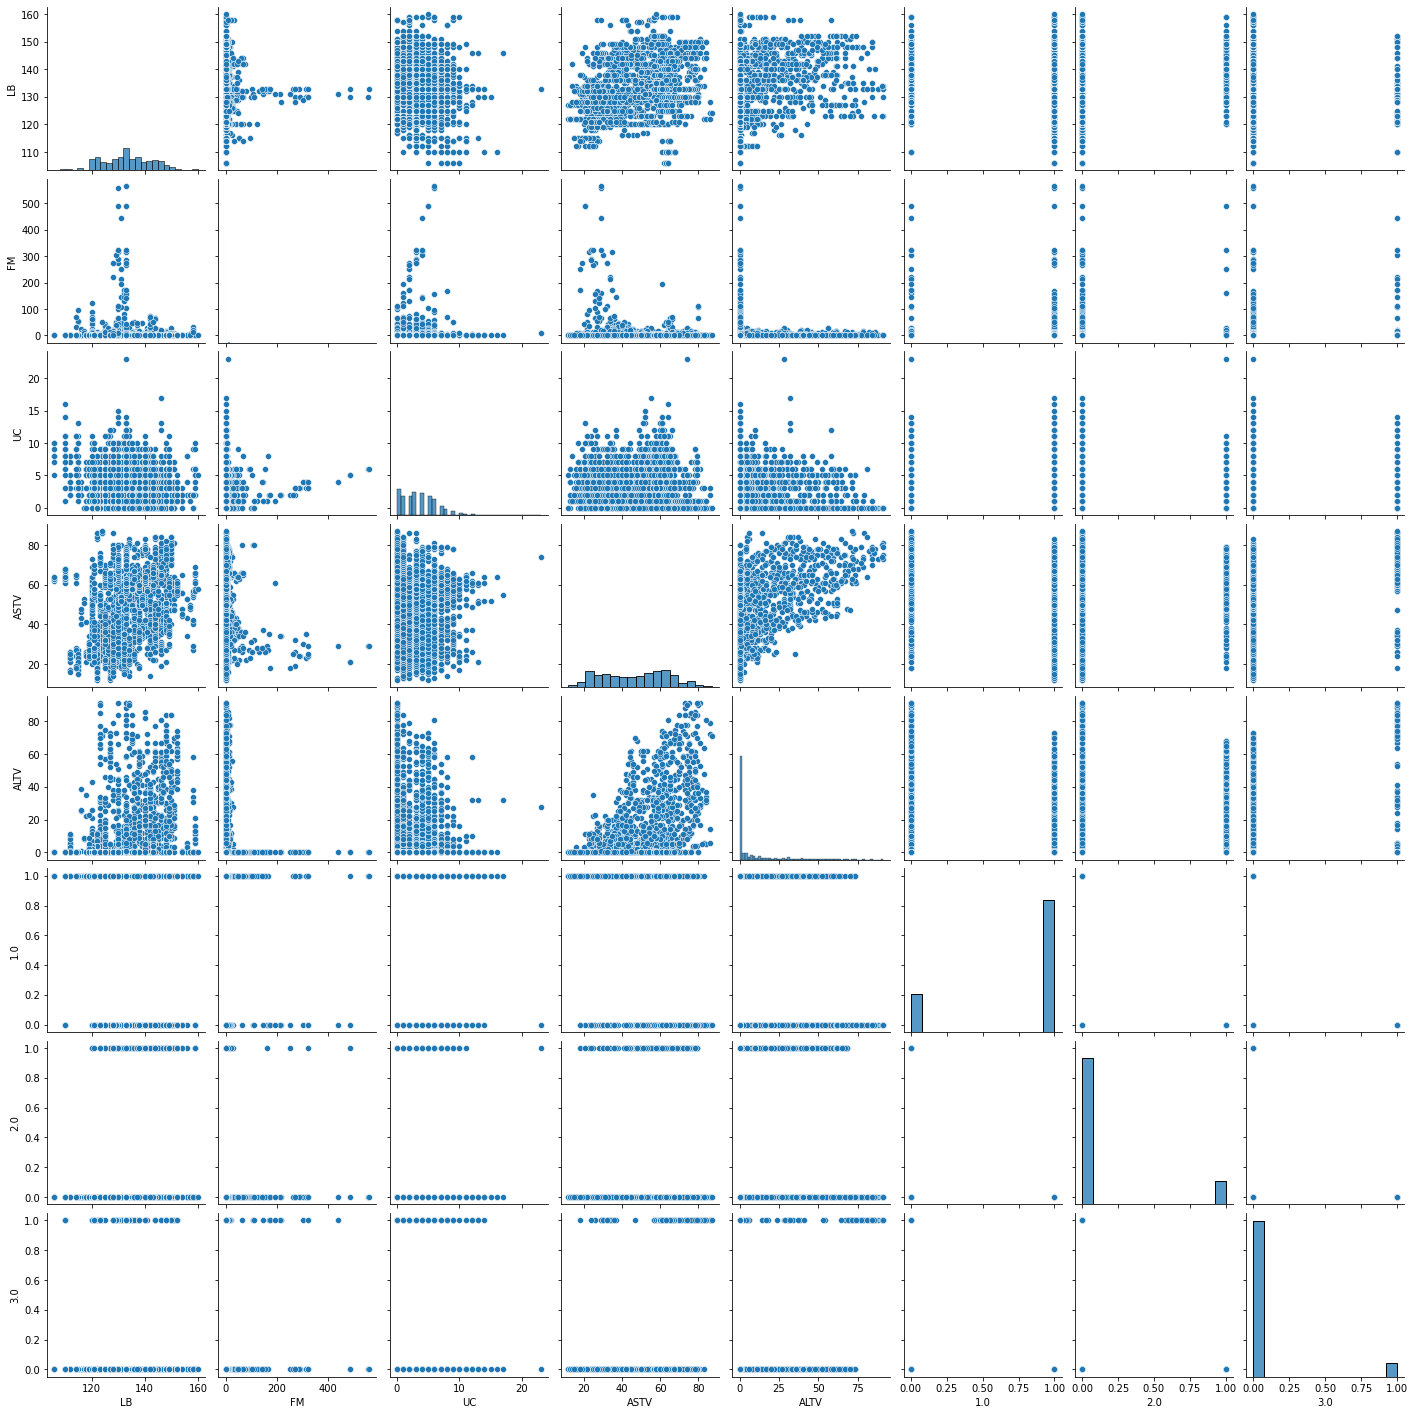

In [80]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.pairplot(merged_data)

In [81]:
predict=model.predict([[132,65,4,17,0]])
predict

1/1 [==============================] - 0s 74ms/step


array([[0.99419034, 0.41727465, 0.30921945]], dtype=float32)

In [82]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [83]:
accuracy = model.evaluate(x_test, y_test)
print("Accuracy: {:.4f}%".format(accuracy[1]*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8498
Accuracy: 84.9765%
